In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230410155618847486'

In [2]:
import matplotlib.pyplot
import numpy
import torch
matplotlib.pyplot.style.use('ggplot')

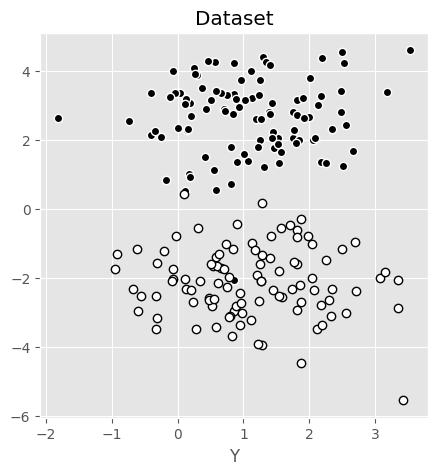

In [3]:
nPerCluster = 100
blur = 1

A = [ 1 ,  3  ]
B = [ 1 , -2 ]

# generate data
a = [A[0] + numpy.random.randn(nPerCluster)*blur , A[1]+ numpy.random.randn(nPerCluster)*blur ]
b = [B[0]+ numpy.random.randn(nPerCluster)*blur, B[1]+ numpy.random.randn(nPerCluster)*blur ]

# true labels
labels_np = numpy.vstack((numpy.zeros((nPerCluster,1)),numpy.ones((nPerCluster,1))))

# concatanate into a matrix
data_np = numpy.hstack((a,b)).T


# convert data into torch tensors

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = matplotlib.pyplot.figure(figsize=(5,5))
matplotlib.pyplot.plot(data[numpy.where(labels==0)[0],0],data[numpy.where(labels==0)[0],1],'wo',markerfacecolor='black')
matplotlib.pyplot.plot(data[numpy.where(labels==1)[0],0],data[numpy.where(labels==1)[0],1],'ko',markerfacecolor='white')
matplotlib.pyplot.title('Dataset')
matplotlib.pyplot.xlabel('X')
matplotlib.pyplot.xlabel('Y')
matplotlib.pyplot.show()


In [4]:
def create_model(learning_rate):
    nn_classifier = torch.nn.Sequential(
        torch.nn.Linear(2,16),
        # torch.nn.ReLU(),
        torch.nn.Linear(16,1),
        # torch.nn.ReLU(),
        torch.nn.Linear(1,1),
        torch.nn.Sigmoid(),
    )
    lossfun = torch.nn.BCELoss()

    optmizer = torch.optim.SGD(nn_classifier.parameters(),lr=learning_rate)
    return nn_classifier,lossfun,optmizer

In [5]:
epochs =  1000

def train_model(nn_classifier):
    losses = torch.zeros(epochs)

    for i in range(epochs):

        pred = nn_classifier(data)

        loss = lossfun(pred,labels)
        losses[i] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = nn_classifier(data)

    totalacc = 100*torch.mean(((predictions>.5)==labels).float())

    return losses,predictions,totalacc


In [6]:
nn_classifier,lossfun,optimizer = create_model(0.01)

losses,predictions,totalacc = train_model(nn_classifier=nn_classifier)

print('Final accuracy: %g%% '%totalacc)

Final accuracy: 99% 


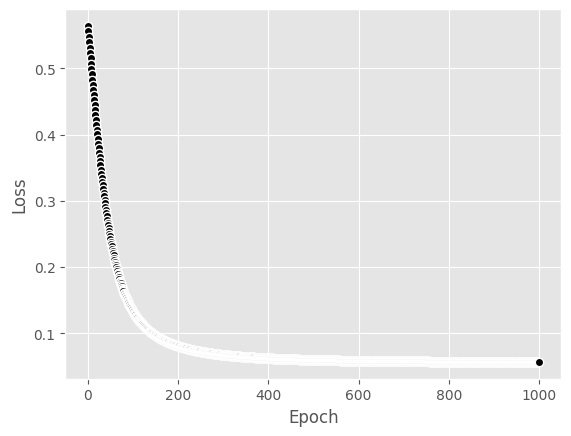

In [7]:
matplotlib.pyplot.plot(losses.detach(),'wo',markerfacecolor='k')
matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.show()

In [8]:
# learning raate
learning_rates = numpy.linspace(.001,.1,50)

# initialize
accByLR = []
allLosses = numpy.zeros((len(learning_rates),epochs))

for idx,lr in enumerate(learning_rates):

    # create and train models
    nn_classifier,lossfun,optimizer = create_model(lr)
    losses,predictions,totalacc = train_model(nn_classifier=nn_classifier)

    accByLR.append(totalacc)
    allLosses[idx,:]=losses.detach()

Text(0.5, 1.0, 'Losses by Learning Rate')

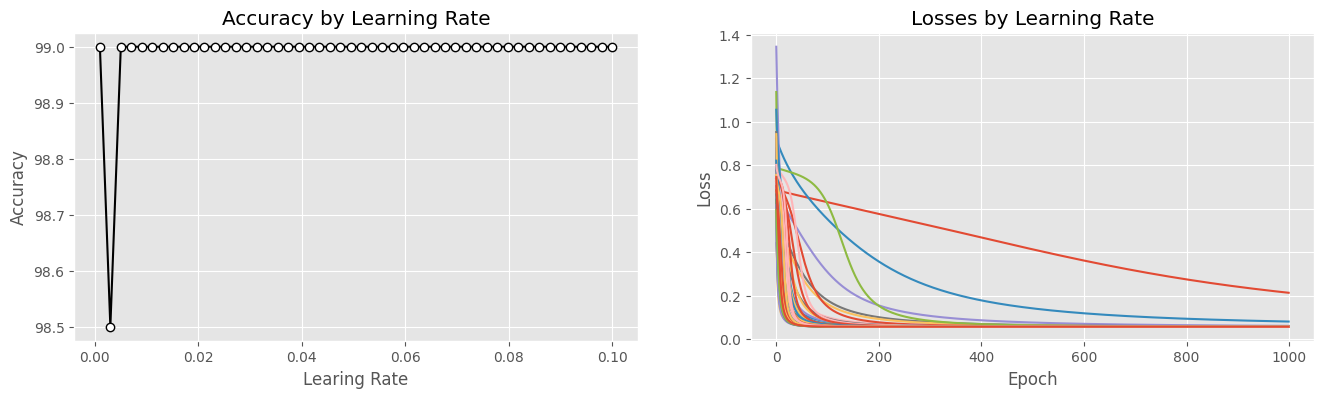

In [9]:
fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(16,4))

ax[0].plot(learning_rates,accByLR,'ko-',markerfacecolor='white')
ax[0].set_xlabel('Learing Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by Learning Rate')

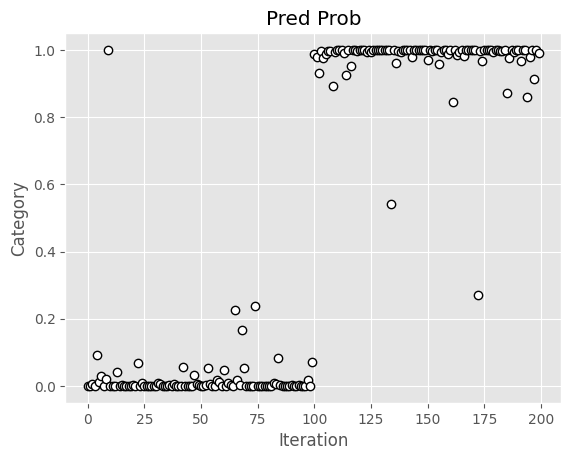

In [10]:
matplotlib.pyplot.plot(predictions.detach(),'ko',markerfacecolor='w')
matplotlib.pyplot.ylabel('Category')
matplotlib.pyplot.xlabel('Iteration')
matplotlib.pyplot.title('Pred Prob')
matplotlib.pyplot.show()